In [42]:
import numpy as np
import math as math
from matplotlib import pyplot as plt 
import random
from sympy import *
from numpy.linalg import inv

In [71]:
#1D Heat Transfer Equation

### CHANGE VALUES IN THESE SECTIONS HERE ###
#define variables to be used in equation
alpha = 2.53e-7 # Heat Diffusivity m^2/s
#Value referenced from https://www.researchgate.net/publication/243414074_How_long_does_it_take_to_boil_an_egg_Revisited
x_step = 3.75e-3 # X step in meters
t_step = 1 # T step

#Quail 12.5mm Chicken 25mm Ostrich 75mm
#Defining lengths and time limit
length = 0.075 # Length of beam in meters
total_time = 5500 # total time range in seconds

#Initializes the temperature matrix of values
#[Time Iteration Indexes , Indexes of Beam]
temperature = np.zeros((int(total_time/t_step), int(length/x_step)+1)) # +1 is to include the end portion because of how lists are indexed

#Define a starting condition for variables inside the matrix
temperature [0,:] = 25

#Boundary Conditions
#temperature[:,0] = 100
temperature[:,int(length/x_step)] = 100


### END OF CHANGING VALUES ###

#F represents the constant
#F = alpha/(x_step**2)*t_step
F = (alpha * t_step) / (x_step**2)
stable_criteria = 1- (2*F)
#Conditional statement, this must be stable in order for the explicit time advance scheme to work properly
if stable_criteria <= 0:
  print ("Unstable")

def temp_next (temp_forward_k, temp_now_k, temp_back_k, x):
  #temp = (F * temp_forward_k) + ((1 - (2 * F)) * temp_now_k) + (F * temp_back_k)
  temp = (F * ((temp_forward_k - (2 * temp_now_k) + temp_back_k) + (2/(x)) * ((temp_forward_k - temp_back_k) * (x_step / 2)))) + temp_now_k
  return temp

print(temperature)


[[ 25.  25.  25. ...  25.  25. 100.]
 [  0.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0. 100.]
 ...
 [  0.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0. 100.]
 [  0.   0.   0. ...   0.   0. 100.]]


In [72]:
#Main Code

time = np.arange(0,total_time,t_step)
position = np.arange(0,(length+x_step),x_step)

for k in range(int(total_time/t_step)-1): 
  for i in range(int(length/x_step)):
    if i == 0:
      temperature[(k+1),(i)] = temperature[k,i+1]
    else:
      temperature[(k+1),(i)] = temp_next(temperature[k,(i+1)], temperature[k,i], temperature[k,i-1], x_step * i)
    print (temperature)
print (position)
#print (time)

Streaming output truncated to the last 5000 lines.
 [  0.           0.           0.         ...   0.           0.
  100.        ]
 [  0.           0.           0.         ...   0.           0.
  100.        ]]
[[ 25.          25.          25.         ...  25.          25.
  100.        ]
 [ 25.          25.          25.         ...  25.          26.42035088
  100.        ]
 [ 25.          25.          25.         ...  25.02697334  27.78959437
  100.        ]
 ...
 [  0.           0.           0.         ...   0.           0.
  100.        ]
 [  0.           0.           0.         ...   0.           0.
  100.        ]
 [  0.           0.           0.         ...   0.           0.
  100.        ]]
[[ 25.          25.          25.         ...  25.          25.
  100.        ]
 [ 25.          25.          25.         ...  25.          26.42035088
  100.        ]
 [ 25.          25.          25.         ...  25.02697334  27.78959437
  100.        ]
 ...
 [  0.           0.           0.    

4529


Text(0, 0.5, 'Temperature in degrees C')

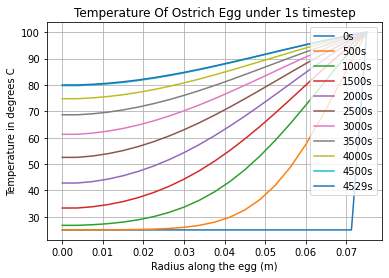

In [76]:
for j in range(0,int(total_time/t_step)-1,1):
  if temperature[j,0] >=80:
    print (time[j])
    plt.plot(position,temperature[j,:])
    break
  if j%500 == 0:
    plt.plot(position,temperature[j,:])
  
plt.grid(true)
plt.title("Temperature Of Ostrich Egg under 1s timestep")
plt.legend(['0s', '500s', '1000s', '1500s', '2000s', '2500s' , '3000s', '3500s','4000s','4500s', '4529s'], loc = 'upper right')
plt.xlabel("Radius along the egg (m)")
plt.ylabel("Temperature in degrees C")
#plt.plot(temperature[0,:])
#plt.plot(temperature[(total_time-1),:])